In [2]:

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from time import sleep
from selenium.common.exceptions import StaleElementReferenceException
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.edge.service import Service

In [2]:
PATH ='edge_driver\\msedgedriver.exe'

service = Service(PATH)
driver = webdriver.Edge(service=service)
url='https://www.amazon.com/DIERYA-Programmable-Customizable-Honeycomb-Drag-Free/dp/B0BGS8PG3K/ref=sr_1_1_sspa?crid=2OZ2HU04D3MJ0&dib=eyJ2IjoiMSJ9.SmIo5lSUmWub_0kmt39fqJFUtNZ54Nku_AWC2A3MERwFzP0sf9o4_urjwc8SLjewAFSMkXaV5msWCNapSpnyvqVxjhTg1TUSyA0g34EhHNwFGsRuhmsSu_d9ADOG7KSAA7yNy3k39UBAmKCSHA1Cod17od5pp6ftLTVUUtrrlEfEOrifBYoYxszj5azKUqqPJK8wWDYTdiq8exYiNhsYfAxrMvaumhoYxKqlwLRklnc.r6rDZODB8p5dVB7HQWmrPMnrWqaALtH9ChSsrz8M2uc&dib_tag=se&keywords=mouse%2Bgaming&qid=1729342007&sprefix=%2Caps%2C170&sr=8-1-spons&sp_csd=d2lkZ2V0TmFtZT1zcF9hdGY&th=1'
driver.get(url)
driver.find_element(By.XPATH,"//*[@data-hook='see-all-reviews-link-foot']").click()
# driver.find_element(By.XPATH,"//*[@data-hook='cr-translate-these-reviews-link']").click()


KeyboardInterrupt: 

In [4]:

from datetime import datetime
def remove_things(text):
    
    test= text.split('\n')

    # Original string parts
    month = test[2].split()[-3]
    day = int(test[2].split()[-2].split(',')[0])
    year = test[2].split()[-1]

    # Create a single string representing the date
    date_string = f"{month} {day}, {year}"

    # Parse the string into a datetime object
    date_obj = datetime.strptime(date_string, "%B %d, %Y").date()
    return test[0],test[1],date_obj,test[4]

In [5]:
import time
def scrappingData():
    elements = []
    ratings=[]
    while len(elements) < 100:
        # Find comments that start with "customer_review"
        teen_comments = driver.find_elements(By.XPATH, "//*[starts-with(@id, 'customer_review')]")
        # elements.extend(teen_comments)
        for comment in teen_comments:
            elements.append(comment.text)

        
        # teen_ratings = driver.find_elements(By.XPATH, "//*[starts-with(@id, 'customer_review')]//div[2]/a/i/span")
        # for rating in teen_ratings:
        #     ratings.append(rating.text)
        # Find ratings that start with "customer_review"
        teen_ratings = driver.find_elements(By.XPATH, "//*[starts-with(@id, 'customer_review')]//div[2]/a/i/span")
        
        # Extract ratings without using .text
        for rating in teen_ratings:
            # Using the get_attribute method to retrieve the inner HTML or a specific attribute
            ratings.append(rating.get_attribute('innerHTML'))

        # Pause briefly
        print('wsln daba l ',len(elements))
        time.sleep(1)

        # Try to find the next page button
        try:
            next_button = driver.find_element(By.XPATH, '//*[@id="cm_cr-pagination_bar"]/ul/li[2]/a')
            next_button.click()  # Click the next page button
        except NoSuchElementException:
            print("Next page button does not exist. Stopping pagination.")
            break  # Break the loop if the "Next" button is not found
        
        # Pause briefly after clicking
        time.sleep(1)
    return elements,ratings

In [6]:

import pandas as pd
    # turn the text to rating star to int 

def test(elements,ratings):
    new_ratings=[int(rating.split()[0].split('.')[0]) for rating in ratings]
    df = pd.DataFrame([remove_things(x) for x in elements], columns=['Username', 'Title', 'Date', 'Comment'])
    df['rating']=new_ratings
    return df

In [7]:
elements,ratings=scrappingData()
df=test(elements,ratings)

wsln daba l  10
wsln daba l  20
wsln daba l  30
wsln daba l  40
wsln daba l  50
wsln daba l  60
wsln daba l  70
wsln daba l  80
wsln daba l  90
wsln daba l  100
Next page button does not exist. Stopping pagination.


In [1]:
# df.to_csv('products.csv', index=False)
import pandas as pd
df=pd.read_csv('products.csv')

In [11]:
df['Comment'][0]

'I was looking for a breathable type mouth for a while and i could not afford the other expensive ones so i wanted to give this one a try, ive been gaming with it and its super nice, it feels like really good quality and its also very pretty looking! Its DPI settings are super easy and super fast as well and the colors are nice too. I would reccomend if youre looking for a pretty/nice looking mouse that has the same functions as a much more expensive one for a low price! :))'

In [15]:
# pre processing of data 
import nltk 
nltk.word_tokenize(df['Comment'][0])

['I',
 'was',
 'looking',
 'for',
 'a',
 'breathable',
 'type',
 'mouth',
 'for',
 'a',
 'while',
 'and',
 'i',
 'could',
 'not',
 'afford',
 'the',
 'other',
 'expensive',
 'ones',
 'so',
 'i',
 'wanted',
 'to',
 'give',
 'this',
 'one',
 'a',
 'try',
 ',',
 'ive',
 'been',
 'gaming',
 'with',
 'it',
 'and',
 'its',
 'super',
 'nice',
 ',',
 'it',
 'feels',
 'like',
 'really',
 'good',
 'quality',
 'and',
 'its',
 'also',
 'very',
 'pretty',
 'looking',
 '!',
 'Its',
 'DPI',
 'settings',
 'are',
 'super',
 'easy',
 'and',
 'super',
 'fast',
 'as',
 'well',
 'and',
 'the',
 'colors',
 'are',
 'nice',
 'too',
 '.',
 'I',
 'would',
 'reccomend',
 'if',
 'youre',
 'looking',
 'for',
 'a',
 'pretty/nice',
 'looking',
 'mouse',
 'that',
 'has',
 'the',
 'same',
 'functions',
 'as',
 'a',
 'much',
 'more',
 'expensive',
 'one',
 'for',
 'a',
 'low',
 'price',
 '!',
 ':',
 ')',
 ')']

In [3]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia= SentimentIntensityAnalyzer()
sia.polarity_scores(df['Comment'][0])

{'neg': 0.02, 'neu': 0.681, 'pos': 0.299, 'compound': 0.9834}

In [5]:
df.dropna(inplace=True)

In [6]:
from tqdm import tqdm

# Assuming `sia` is the SentimentIntensityAnalyzer from the Vader library
# Assuming `df` is your DataFrame and has a 'Comment' column

res = {}  # Dictionary to store the results

for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Comment']
    polarity_score = sia.polarity_scores(text)  # Get sentiment analysis score
    res[i] = polarity_score  # Store result in dictionary with index `i`


100%|██████████| 98/98 [00:00<00:00, 2576.55it/s]


In [7]:
sentiment_df = pd.DataFrame.from_dict(res, orient='index')
sentiment_df=sentiment_df.join(df)

In [8]:
sentiment_df

,neg,neu,pos,compound,Username,Title,Date,Comment,rating
0,0.020,0.681,0.299,0.9834,Adriana,Very good mouse for the price,2023-12-24,I was looking for a breathable type mouth for ...,5
1,0.000,0.692,0.308,0.9169,Gabriel Coigny,One of the best value mice,2023-03-21,To be honest I didn’t expect this mouse to be ...,5
2,0.000,0.618,0.382,0.4753,Jake Griffin,Great for the money!,2024-04-16,Does the job and looks nice!,4
3,0.061,0.866,0.073,0.1505,Anthony,Incredible,2024-03-30,"My pc off, but lemme tell you im not a mouse a...",5
4,0.000,0.526,0.474,0.9700,Hailey,Pretty large but works so amazingly,2024-04-11,It’s pretty easy to setup and it’s so comforta...,5
...,...,...,...,...,...,...,...,...,...
95,0.000,0.256,0.744,0.4404,Samir P.,Very good,2023-12-28,Good product,5
96,0.000,0.887,0.113,0.6226,San Diego Prime,Nice mouse for office use,2023-05-20,I bought this mouse for non-gaming (work) use....,5
97,0.000,0.895,0.105,0.5162,bleach,its been a few months,2024-03-31,im an avid gamer and have semi enjoyed the mou...,2
98,0.000,0.459,0.541,0.7096,Kerry C.,Works good,2023-09-23,Works good for daughter and looks cute,5


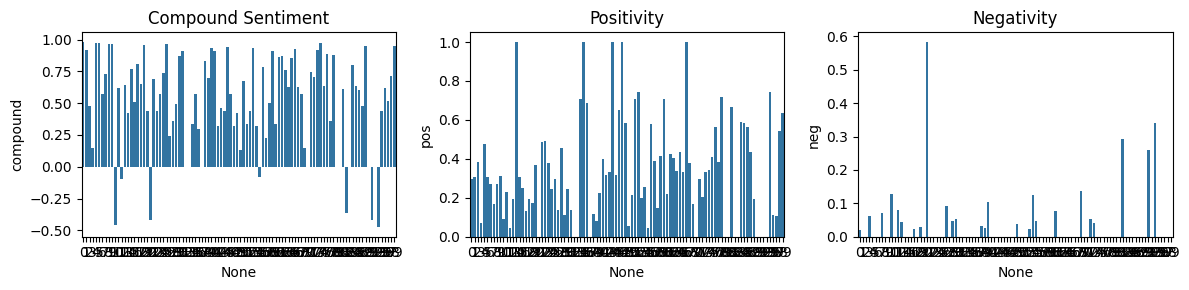

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots
fig, ax = plt.subplots(1, 3, figsize=(12, 3))

# Create bar plots
sns.barplot(data=sentiment_df, x=sentiment_df.index, y='compound', ax=ax[0])
sns.barplot(data=sentiment_df, x=sentiment_df.index, y='pos', ax=ax[1])
sns.barplot(data=sentiment_df, x=sentiment_df.index, y='neg', ax=ax[2])

# Set titles for each subplot
ax[0].set_title('Compound Sentiment')
ax[1].set_title('Positivity')
ax[2].set_title('Negativity')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


In [10]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [11]:
model=f'cardiffnlp/twitter-roberta-base-sentiment-latest'
tokinzer=AutoTokenizer.from_pretrained(model)
model=AutoModelForSequenceClassification.from_pretrained(model)

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

KeyboardInterrupt: 